In [12]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [17]:
df=open('StudentsPerformance.csv')
df=pd.read_csv(df)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
import os
os.getcwd()

'/Users/kaharbawa/Documents/UPWORK/Ali'

In [18]:
df.shape

(1000, 8)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [26]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

# Descriptive Stattistics

In [31]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [33]:
df.select_dtypes('object').describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [22]:
# lets check the no. of unique items present in the categorical column

df.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [23]:
# No missing data
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [37]:
import dabl

/Users/kaharbawa/opt/anaconda3/lib/python3.7/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


Target looks like regression


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6729b25d0>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe672a2d710>,
       dtype=object)]

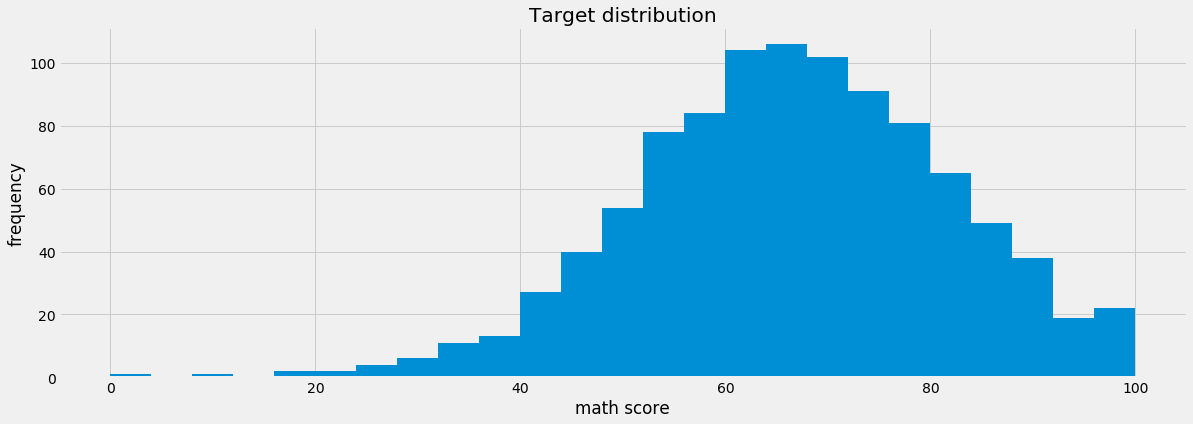

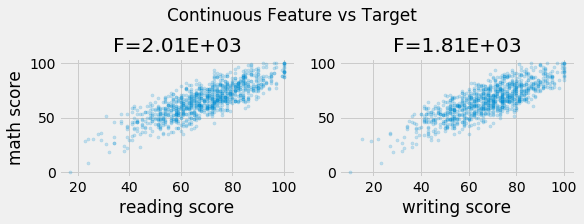

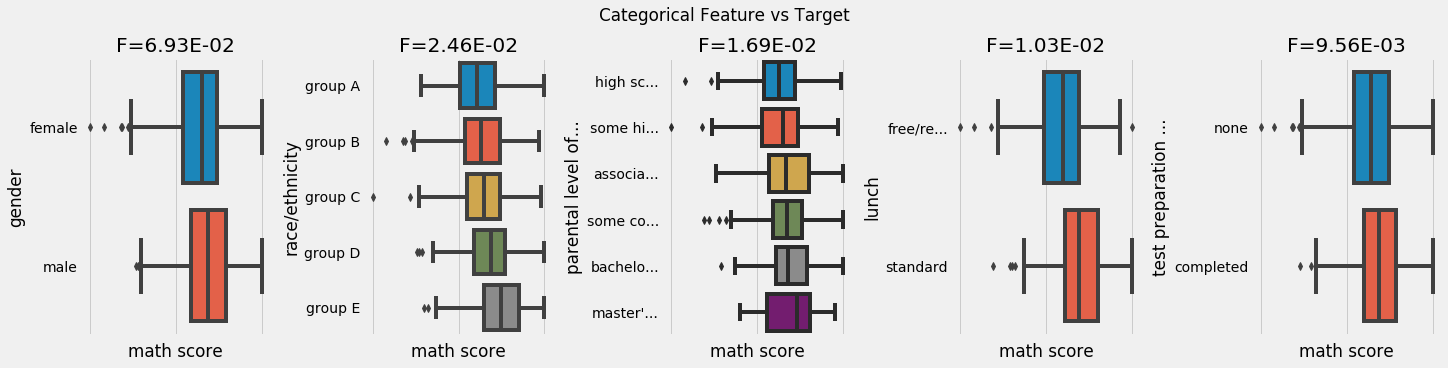

In [38]:
# comparison of all other attributes with respect to Math Marks
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(df, target_col = 'math score')

In [ ]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(df, target_col = 'writing score')

In [ ]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(df, target_col = 'reading score')

In [ ]:
# Students Scores by gender
df.groupby(['gender']).agg(['min','median','max'])

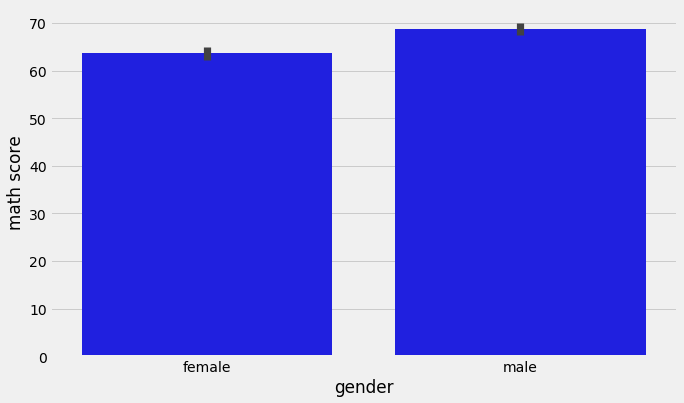

In [44]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'gender', y = 'math score', data = df, color='b')

## Features engineering 

In [ ]:
# feature engineering on the data to visualize and solve the dataset more accurately

# setting a passing mark for the students to pass on the three subjects individually
passmarks = 40

# creating a new column pass_math, this column will tell us whether the students are pass or fail
df['pass_math'] = np.where(df['math score']< passmarks, 'Fail', 'Pass')
df['pass_reading'] = np.where(df['reading score']< passmarks, 'Fail', 'Pass')
df['pass_writing'] = np.where(df['writing score']< passmarks, 'Fail', 'Pass')
df['status'] = df.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

In [ ]:
df.head()

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
df['test preparation course'] = le.fit_transform(df['test preparation course'])

# label encoding for lunch
df['lunch'] = le.fit_transform(df['lunch'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
df['race/ethnicity'] = df['race/ethnicity'].replace('group A', 1)
df['race/ethnicity'] = df['race/ethnicity'].replace('group B', 2)
df['race/ethnicity'] = df['race/ethnicity'].replace('group C', 3)
df['race/ethnicity'] = df['race/ethnicity'].replace('group D', 4)
df['race/ethnicity'] = df['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
df['parental level of education'] = le.fit_transform(df['parental level of education'])

#label encoding for gender
df['gender'] = le.fit_transform(df['gender'])

# label encoding for pass_math
df['pass_math'] = le.fit_transform(df['pass_math'])

# label encoding for pass_reading
df['pass_reading'] = le.fit_transform(df['pass_reading'])

# label encoding for pass_writing
df['pass_writing'] = le.fit_transform(df['pass_writing'])

# label encoding for status
df['status'] = le.fit_transform(df['status'])

In [ ]:
df.head()

## Data preprocessing

In [ ]:
y=df['status']
x=df.drop(['status'], axis=1)

In [ ]:
x.shape

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 123)


In [ ]:
# Data scaling
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

## 1- Logistic Regression 

In [ ]:
from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_predict = model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_predict))

## 2- Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))

## 3- Regression Analysis

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = tree.DecisionTreeClassifier() 
model = model.fit(x_train, y_train)
model

In [ ]:
y_predict=model.predict(x_test)
print(confusion_matrix(y_test,y_predict))

In [ ]:
print(classification_report(y_test, y_predict))

## 4- Support Vector Classifier (SVM)

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
y_predict= svc.predict(x_test)
print(classification_report(y_test, y_predict))

## 5- Learning Vector Quantization (LVQ)

In [ ]:
from neupy import algorithms
lvqnet = algorithms.LVQ(n_inputs=12, n_classes=2)
lvqnet.train(x_train, y_train, epochs=500)
y_predict=lvqnet.predict(x_test)
print(classification_report(y_test, y_predict))

## 6- Linear Discriminant Analysis (LDA)


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda =LinearDiscriminantAnalysis(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

In [ ]:
lvqnet = algorithms.LVQ(n_inputs=12, n_classes=2)
lvqnet.train(x_train, y_train, epochs=500)
y_predict=lvqnet.predict(x_test)
print(classification_report(y_test, y_predict))